# Introduction

Modern AI developments constantly reduce the gap between ML algorithms and humans. Back in the 90's, the "Wisconsin Breast Cancer Dataset" ([WBCD](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) )) was released, and soon gained a recognition as one of the first milestones of AI. In the absence of any advanced computational equipment, scientists were focused on extraction of meaningful insights, in attempt to distinguish between the samples :

<center><img src="https://github.com/Daniboy370/Machine-Learning/blob/master/Misc/Latex/Images/Benign_Malignant.png?raw=true" width="700px" /></center>

Interestingly, several suspicious differences were found, thereby encouraging researchers to further understand what dominant features may affect the decision rule :
 
<center><img src="https://github.com/Daniboy370/Machine-Learning/blob/master/Misc/Latex/Images/diagnosis.png?raw=true" width="800px"/></center>


# Load Libraries

In [1]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
from itertools import chain

from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore') #ignore warning messages

# Read Data

In [2]:
df = pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data Set.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


**Information : [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 
* ID number 
* Diagnosis (M = malignant, B = benign)  

Ten real-valued features are computed for each cell nucleus:

   a) radius (mean of distances from center to points on the perimeter)
   
   b) texture (standard deviation of gray-scale values)
   
   c) perimeter

   d) area
    
   e) smoothness (local variation in radius lengths)

   f) compactness (perimeter^2 / area - 1.0)
   
   g) concavity (severity of concave portions of the contour)
    
   h) concave points (number of concave portions of the contour)
   
   i) symmetry 
   
   j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

The mean, standard error (SE), and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

# Data Cleaning 

**There are 3 things that take my attention**
1) There is an **id** that cannot be used for classificaiton 

2) **Diagnosis** is our class label

3) **Unnamed: 32** feature includes NaN so we do not need it.

Therefore, drop these unnecessary features.

In [3]:
# Note: only 'Unnamed: 32' is completely null, probably an error in the dataset, we drop it in below
df.drop(["id", "Unnamed: 32"], axis=1,inplace=True)

In [4]:
#Check any Duplication 
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 0 duplicated values in data frame


In [5]:
# Check and Drop Nulls
print("prior shape: ", df.shape)
df.dropna(how='any', inplace=True)
print("post shape: ", df.shape)

prior shape:  (569, 31)
post shape:  (569, 31)


# Exploratory Data Analysis (EDA)

In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Target Distribution

In [8]:
B, M = df.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Number of Benign:  357
Number of Malignant :  212


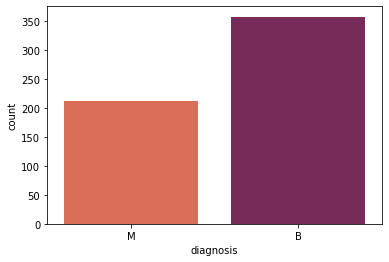

In [9]:
sns.countplot(x="diagnosis", data=df, palette="rocket_r")
plt.show()

In [10]:
benign = len(df[df.diagnosis == 'B'])
malignant = len(df[df.diagnosis == 'M'])
print("Percentage of Diagnosis (Benign): {:.2f}%".format((benign / (len(df.diagnosis))*100)))
print("Percentage of Diagnosis (Malignant): {:.2f}%".format((malignant / (len(df.diagnosis))*100)))

Percentage of Diagnosis (Benign): 62.74%
Percentage of Diagnosis (Malignant): 37.26%


### Data Visualization 

In [11]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Note that the values for each features differs a lot, therefore standardization is required. 

In [12]:
# Reassign target to binary 
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [13]:
# y includes our labels and x includes our features
data = df.copy()

target_column = ['diagnosis']
predictors = list(set(list(data.columns))-set(target_column))

X = data[predictors].values
y = data[target_column].values
# y = np.ravel(y,order = 'C')

# Scaling by normalizing
data[predictors] = data[predictors]/data[predictors].max() 
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.502572,0.491081,0.487899,0.261851,0.589720,0.302087,0.208058,0.243137,0.595927,...,0.451420,0.518313,0.426995,0.207001,0.594648,0.240326,0.217403,0.393836,0.436992,0.404558
std,0.483918,0.125366,0.109497,0.128907,0.140709,0.086072,0.152903,0.186785,0.192857,0.090179,...,0.134108,0.124067,0.133768,0.133840,0.102572,0.148711,0.166633,0.225884,0.093202,0.087042
min,0.000000,0.248346,0.247200,0.232308,0.057377,0.322093,0.056109,0.000000,0.000000,0.348684,...,0.220033,0.242632,0.200677,0.043535,0.319721,0.025794,0.000000,0.000000,0.235764,0.265253
25%,0.000000,0.416222,0.411660,0.398780,0.168053,0.528580,0.187956,0.069260,0.100944,0.532566,...,0.360988,0.425515,0.334833,0.121133,0.523810,0.139130,0.091454,0.223127,0.377222,0.344386
50%,0.000000,0.475631,0.479633,0.457507,0.220352,0.586720,0.268182,0.144189,0.166501,0.589474,...,0.415372,0.512919,0.388774,0.161378,0.589847,0.200284,0.181070,0.343402,0.425128,0.385735
75%,1.000000,0.561366,0.554990,0.552255,0.312955,0.644431,0.377533,0.306232,0.367793,0.643750,...,0.521365,0.599919,0.499204,0.254819,0.655885,0.320510,0.305831,0.554639,0.478909,0.443759
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data_mean = pd.concat([data.iloc[:,0:11]],axis=1)
data_mean = pd.melt(data_mean,id_vars="diagnosis",
                            var_name="features",
                            value_name='value')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

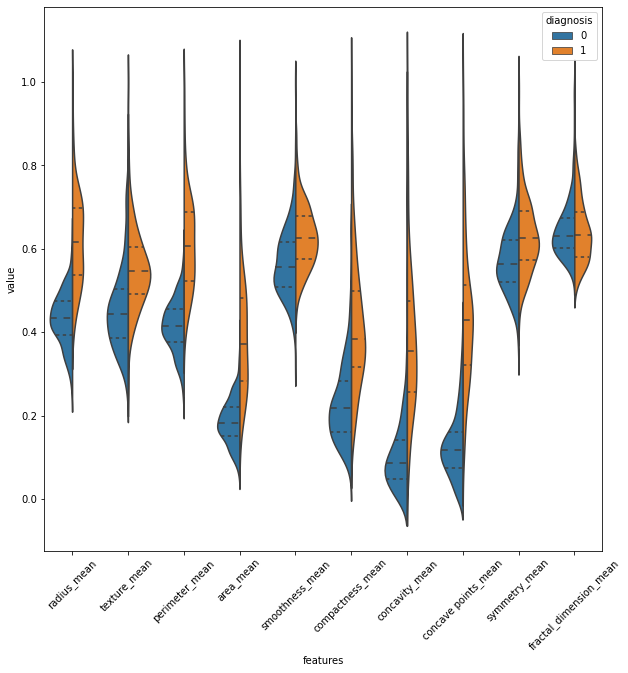

In [15]:
# violin plot 
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_mean,split=True, inner="quart")
plt.xticks(rotation=45)

Note: **texture_mean** feature, median of the *Malignant* and *Benign* looks like separated so it can be good for classification. 

However, in **fractal_dimension_mean** feature,  median of the *Malignant* and *Benign* does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

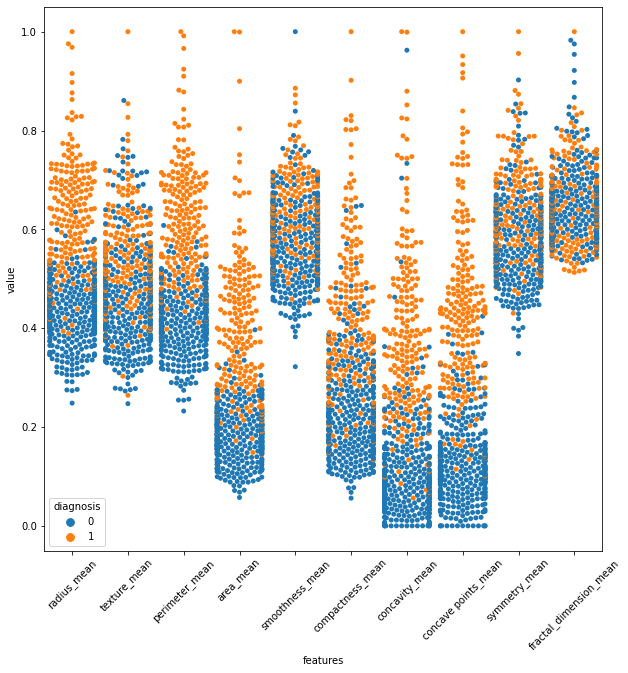

In [16]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_mean)
plt.xticks(rotation=45)

Note: **area_mean** looks like a good feature to separate benign and malignant

<AxesSubplot:>

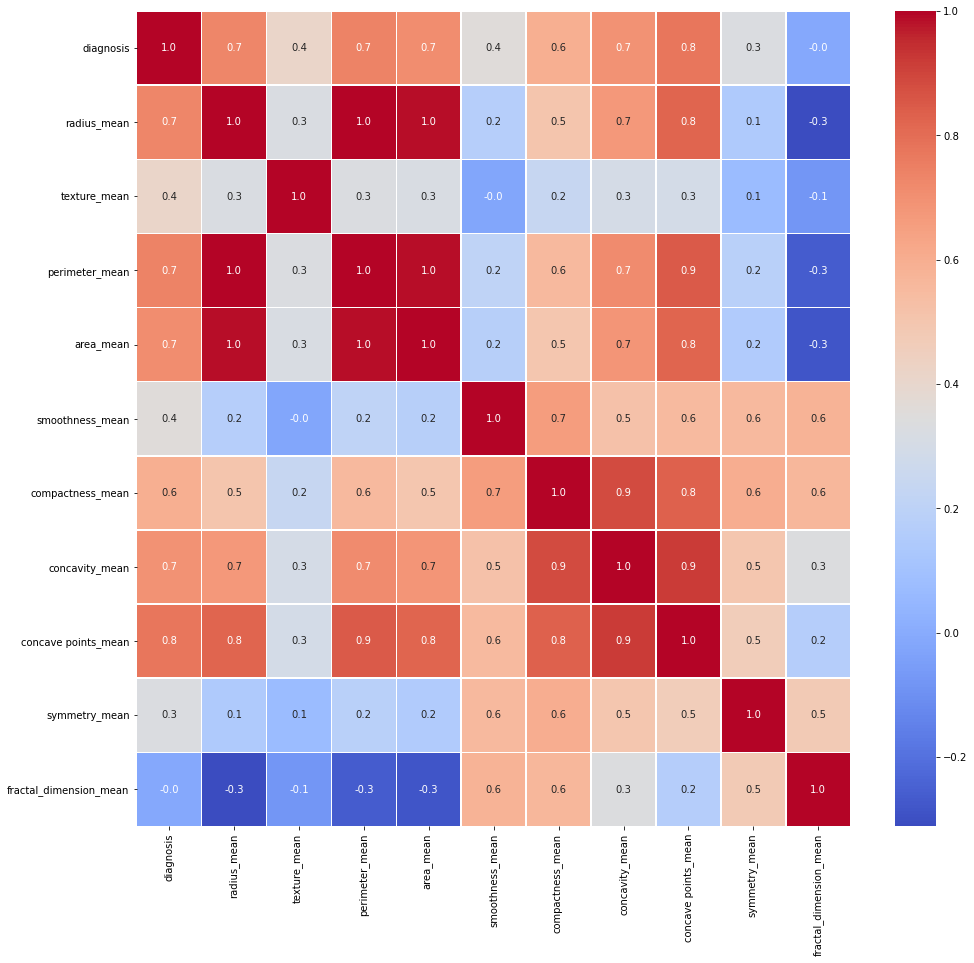

In [17]:
data_mean = pd.concat([data.iloc[:,0:11]],axis=1)
corr = data_mean.corr()
f, ax = plt.subplots(figsize = (16,15))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=0.5, ax=ax, cmap="coolwarm")

Note: 
- radius_mean, perimeter_mean, area_mean are correlated. 
- compactness_mean, concavity_mean, concave points_mean are highly correlated. 

In [18]:
data_se = data.loc[:, ['diagnosis','radius_se','texture_se','perimeter_se', 'area_se', 'smoothness_se', 
                       'compactness_se','concavity_se', 'concave points_se','symmetry_se', 'fractal_dimension_se']]
data_se = pd.melt(data_se,id_vars="diagnosis",
                            var_name="features",
                            value_name='value')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

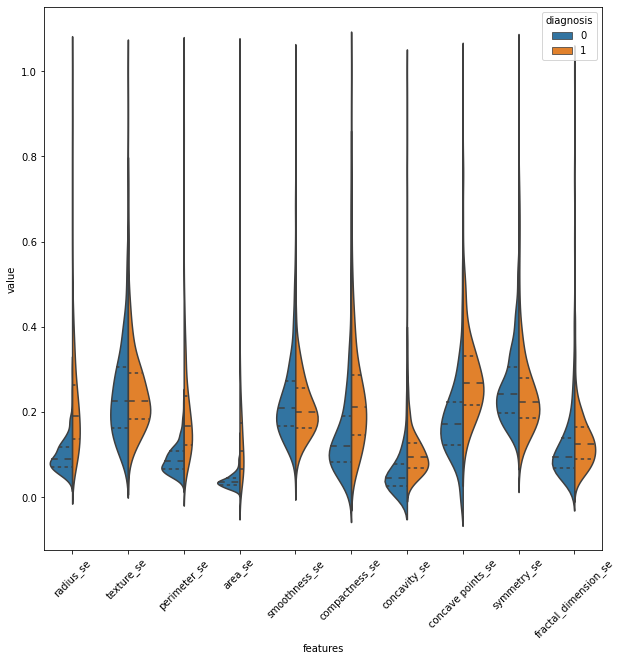

In [19]:
# violin plot 
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_se,split=True, inner="quart")
plt.xticks(rotation=45)

Note: **texture_se** feature,  median of the *Malignant* and *Benign* does not looks like separated so it does not gives good information for classification.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

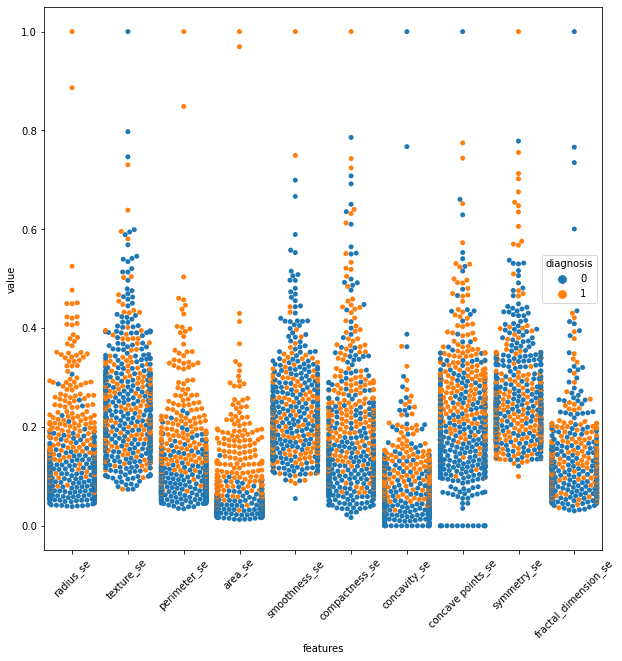

In [20]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_se)
plt.xticks(rotation=45)

Note: **smoothness_se** looks like malignant and benign are mixed so it is hard to classfy while using this feature.

<AxesSubplot:>

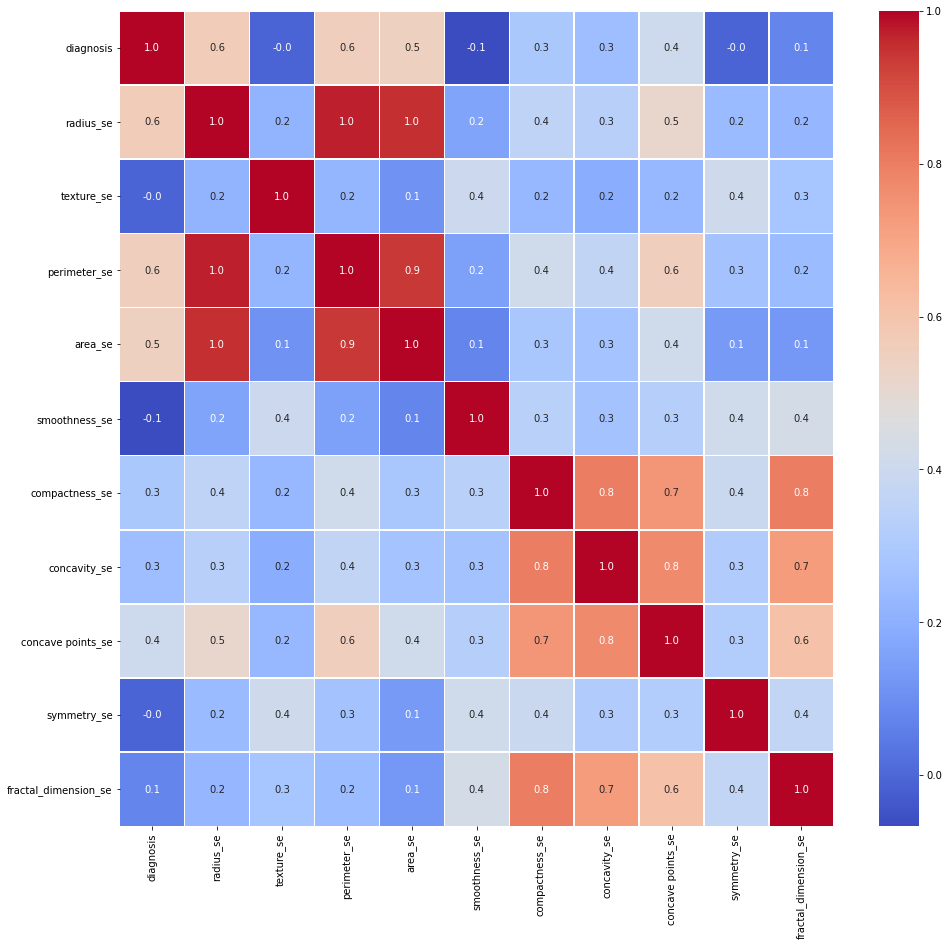

In [21]:
data_se = data.loc[:, ['diagnosis','radius_se','texture_se','perimeter_se', 'area_se', 'smoothness_se', 
                       'compactness_se','concavity_se', 'concave points_se','symmetry_se', 'fractal_dimension_se']]
corr = data_se.corr()
f, ax = plt.subplots(figsize = (16,15))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=0.5, ax=ax, cmap="coolwarm")

Note: **radius_se, perimeter_se, area_se** are correlated. 

In [22]:
data_worst = data.loc[:, ['diagnosis','radius_worst','texture_worst','perimeter_worst', 'area_worst', 
                          'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
                          'symmetry_worst', 'fractal_dimension_worst']]
data_worst = pd.melt(data_worst,id_vars="diagnosis",
                            var_name="features",
                            value_name='value')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

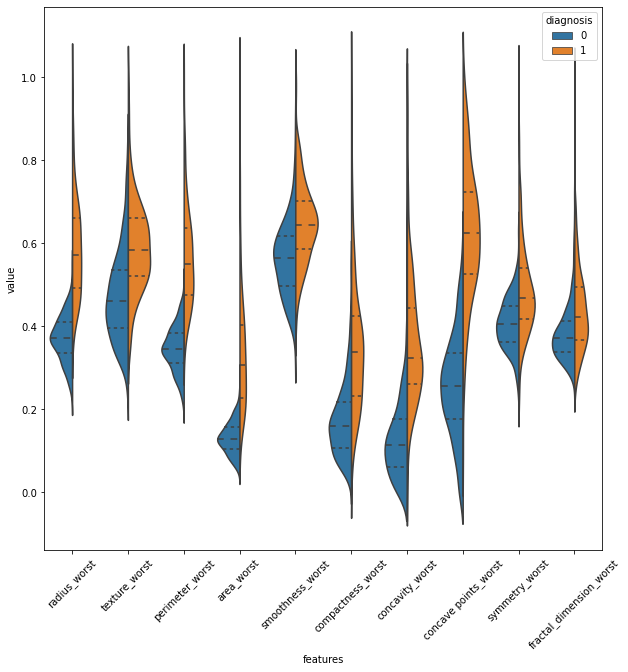

In [23]:
# violin plot 
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_worst,split=True, inner="quart")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

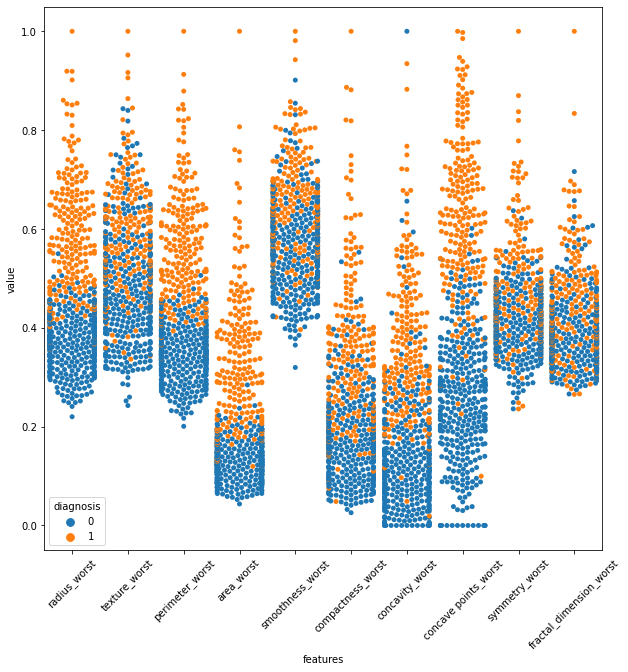

In [24]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_worst)
plt.xticks(rotation=45)

Note: 
From swarmplot, you can see variance more clear. 

**area_worst** looks like malignant and benign are seprated not totaly but mostly.

<AxesSubplot:>

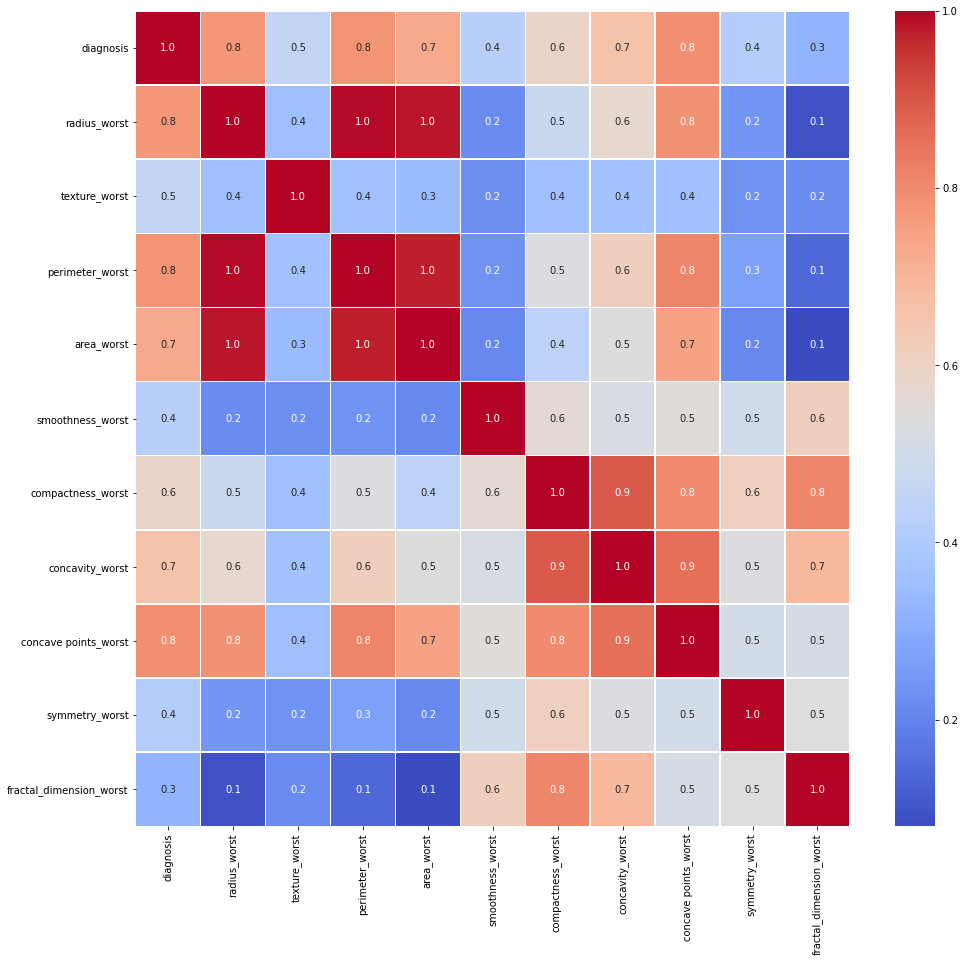

In [25]:
data_worst = data.loc[:, ['diagnosis','radius_worst','texture_worst','perimeter_worst', 'area_worst', 
                          'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst',
                          'symmetry_worst', 'fractal_dimension_worst']]

corr = data_worst.corr()
f, ax = plt.subplots(figsize = (16,15))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=0.5, ax=ax, cmap="coolwarm")

Note: 
- radius_worst, perimeter_worst, area_worst are correlated.
- compactness_worst, concavity_worst, concave points_worst are highly correlated. 

**Let's plot heatmap to observe all correlation between features**

<AxesSubplot:>

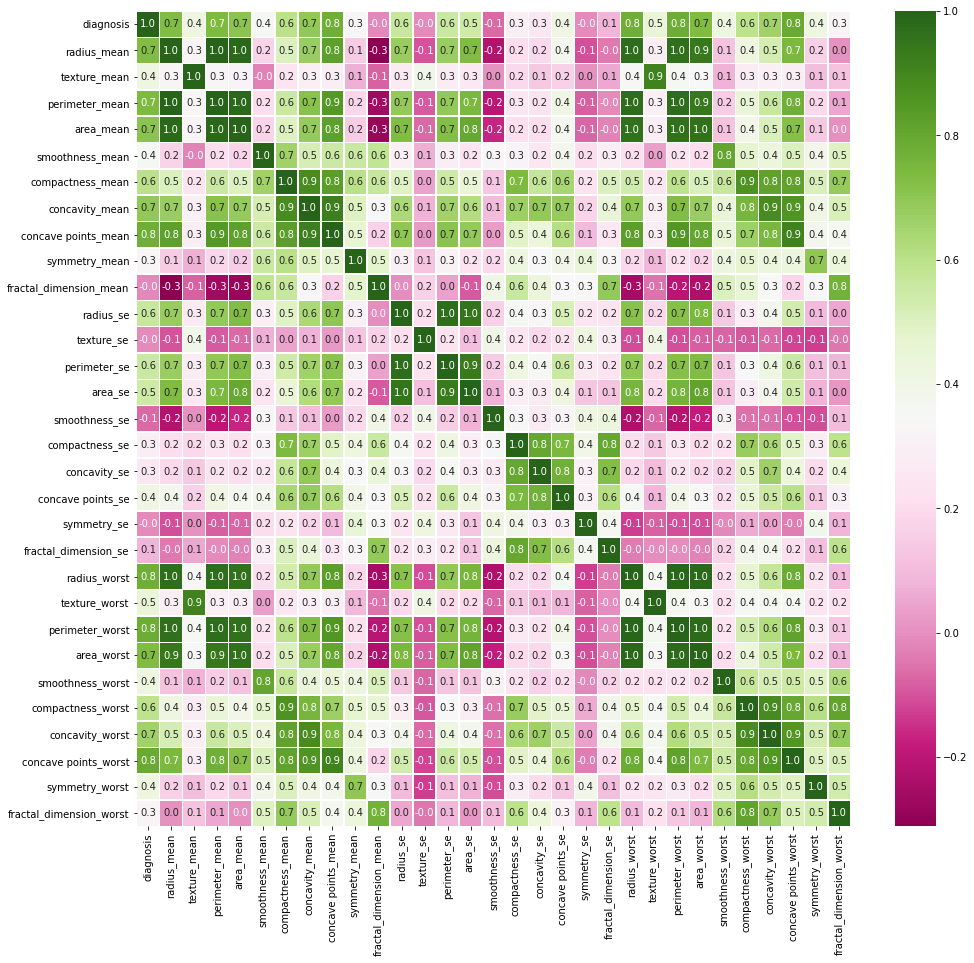

In [26]:
corr = df.corr()
f, ax = plt.subplots(figsize = (16,15))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=0.5, ax=ax, cmap="PiYG")

## Feature Selection
In this part we will select feature with different methods that are feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) and tree based feature selection. We will use random forest classification in order to train our model and predict. 

### 1) Feature selection with correlation and random forest classification

Based on the heatmap, swarmplot and violin plot, we can see some features are easier to separate and be classified in to Benign and Malignant which make them good features for model. 

Let's drop highly correlated (>0.8) and features which are highly mixed. 

In [27]:
df_cleaned = df.drop (['radius_mean','compactness_mean','concave points_mean','perimeter_mean',
                       'fractal_dimension_mean','smoothness_se','texture_se','radius_se',
                       'perimeter_se','radius_worst', 'perimeter_worst','compactness_mean',
                       'concavity_worst','texture_worst','area_mean','concave points_worst','area_se',
                      'smoothness_mean','concavity_se','fractal_dimension_se','fractal_dimension_worst',
                      'compactness_worst'],axis=1)

<AxesSubplot:>

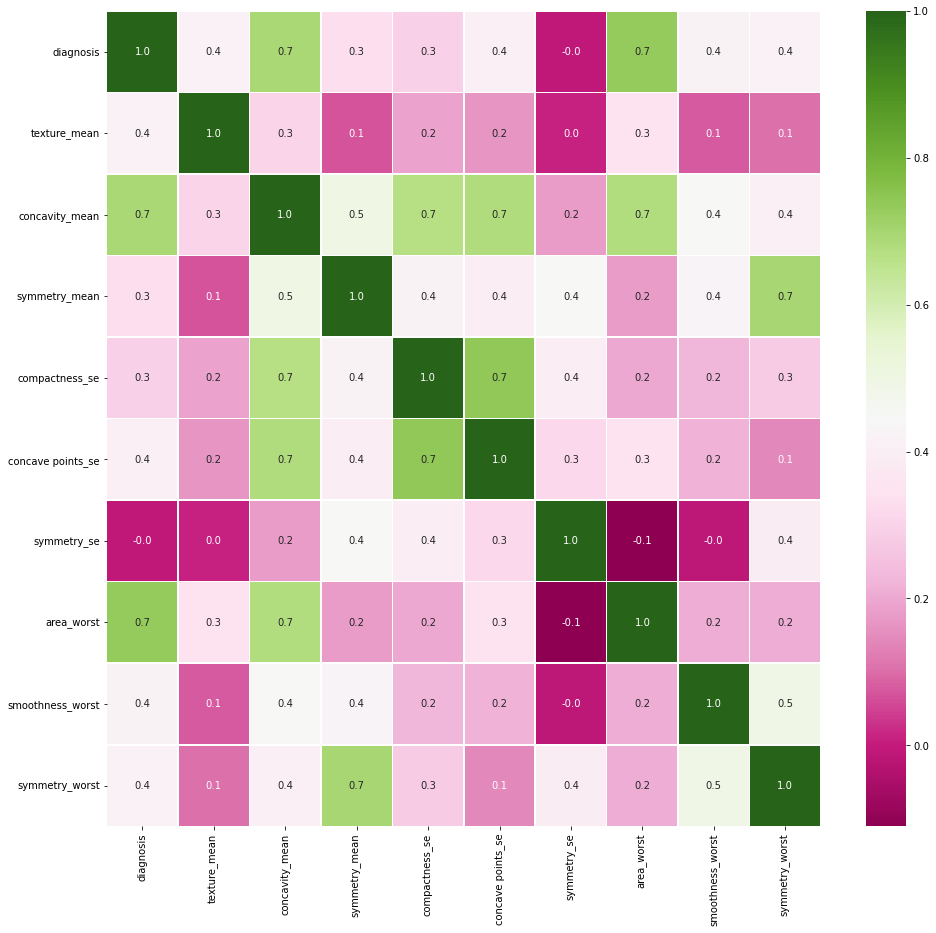

In [28]:
#Recheck 
corr = df_cleaned.corr()
f, ax = plt.subplots(figsize = (16,15))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=0.5, ax=ax, cmap="PiYG")

Well, we choose our features but **did we choose correctly ?** Lets use random forest and find accuracy according to chosen features.

Accuracy is:  0.9824561403508771


<AxesSubplot:>

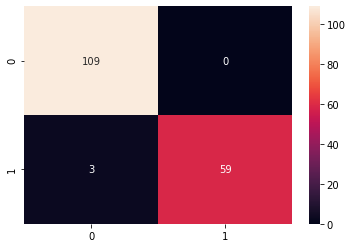

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

x=df_cleaned.drop(['diagnosis'],axis=1)
y=df_cleaned.diagnosis

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=9)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=9)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is almost 98% and as it can be seen in confusion matrix, we make few wrong prediction. 
Now lets see other feature selection methods to find better results.

### 2) Univariate feature selection and random forest classification

In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [30]:
from sklearn.feature_selection import SelectKBest, chi2

# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [31]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [5.02572725e+01 1.32904591e+01 1.98234529e-01 4.54796791e-01
 2.13519556e-01 3.65032836e-04 7.17772982e+04 2.89888772e-01
 9.36178091e-01]
Feature list: Index(['texture_mean', 'concavity_mean', 'symmetry_mean', 'compactness_se',
       'concave points_se', 'symmetry_se', 'area_worst', 'smoothness_worst',
       'symmetry_worst'],
      dtype='object')


Accuracy is:  0.9707602339181286


<AxesSubplot:>

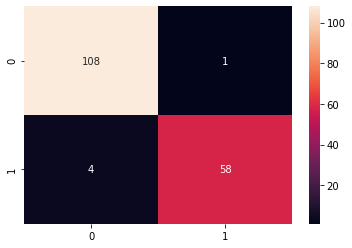

In [32]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier(random_state=9)      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Accuracy is similarly 98% and as it can be seen in confusion matrix, we make few wrong prediction. What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although we use 5 features in selectkBest method accuracies look similar.

We can say that we make good feature selection with rfe and selectkBest methods. However as you can see there is a problem, okey I except we find best 5 feature with two different method and these features are same but why it is **5**. Maybe if we use best 2 or best 15 feature we will have better accuracy. Therefore lets see how many feature we need to use with rfecv method.

### 3) Recursive feature elimination with cross validation and random forest classification
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html>
Now we will not only **find best features** but we also find **how many features do we need** for best accuracy.

In [33]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

# The "accuracy" scoring is proportional to the number of correct classifications
kf = KFold(n_splits=5, shuffle=True, random_state = 9)
clf_rf_3 = RandomForestClassifier(random_state=9) 
rfecv = RFECV(estimator=clf_rf_3, step=1, cv=kf,scoring='accuracy')   
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 7
Best features : Index(['texture_mean', 'concavity_mean', 'compactness_se', 'concave points_se',
       'area_worst', 'smoothness_worst', 'symmetry_worst'],
      dtype='object')


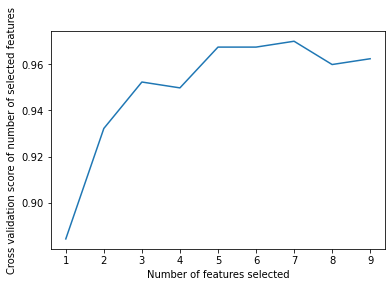

In [34]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Lets look at what we did up to this point. Lets accept that guys this data is very easy to classification. However, our first purpose is actually not finding good accuracy. Our purpose is learning how to make **feature selection and understanding data.** Then last make our last feature selection method.

### 4) Tree based feature selection and random forest classification
<http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>
In random forest classification method there is a **feature_importances_** attributes that is the feature importances (the higher, the more important the feature)!!! 

To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.


In [35]:
my_list = list(df_cleaned.drop(['diagnosis'],axis=1))
my_list

['texture_mean',
 'concavity_mean',
 'symmetry_mean',
 'compactness_se',
 'concave points_se',
 'symmetry_se',
 'area_worst',
 'smoothness_worst',
 'symmetry_worst']

Feature ranking:
1. area_worst (0.363108)
2. concavity_mean (0.240635)
3. texture_mean (0.077459)
4. symmetry_worst (0.071316)
5. smoothness_worst (0.069162)
6. concave points_se (0.068936)
7. compactness_se (0.046711)
8. symmetry_se (0.033214)
9. symmetry_mean (0.029457)


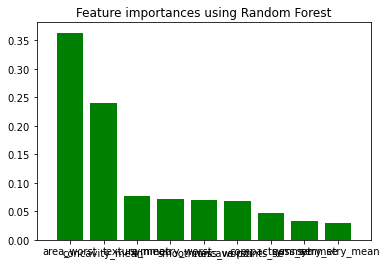

<Figure size 1152x720 with 0 Axes>

In [36]:
#rf.feature_importance

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(random_state=9)
y=df_cleaned['diagnosis']
X=df_cleaned.drop(['diagnosis'],axis=1)

forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
importance_list=[]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, my_list[indices[f]], importances[indices[f]]))
    importance_list.append(my_list[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances using Random Forest")
plt.bar(range(X.shape[1]), importances[indices],
        color="g")
plt.xticks(range(X.shape[1]), importance_list)
plt.xlim([-1, X.shape[1]])
plt.figure(figsize=(16,10))
plt.show()        

In [37]:
df_cleaned = df_cleaned.drop (['symmetry_se', 'symmetry_mean'],axis=1)

In [38]:
my_list = list(df_cleaned.drop(['diagnosis'],axis=1))
my_list

['texture_mean',
 'concavity_mean',
 'compactness_se',
 'concave points_se',
 'area_worst',
 'smoothness_worst',
 'symmetry_worst']

Feature ranking:
1. area_worst (0.357605)
2. concavity_mean (0.279516)
3. texture_mean (0.087976)
4. symmetry_worst (0.081764)
5. smoothness_worst (0.072042)
6. concave points_se (0.068554)
7. compactness_se (0.052544)


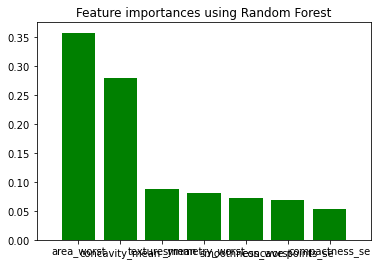

<Figure size 1152x720 with 0 Axes>

In [39]:
# recheck rf.feature_importance

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(random_state=9)
y=df_cleaned['diagnosis']
X=df_cleaned.drop(['diagnosis'],axis=1)

forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
importance_list=[]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, my_list[indices[f]], importances[indices[f]]))
    importance_list.append(my_list[indices[f]])

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances using Random Forest")
plt.bar(range(X.shape[1]), importances[indices],
        color="g")
plt.xticks(range(X.shape[1]), importance_list)
plt.xlim([-1, X.shape[1]])
plt.figure(figsize=(16,10))
plt.show()      

In [42]:
df_cleaned.to_csv (r'C:\Users\HP\Metis\my_fifth_project\Breast Cancer Wisconsin (Diagnostic) Data Set-cleaned.csv', index = False, header=True)

## Feature Extraction

Text(0, 0.5, 'explained_variance_ratio_')

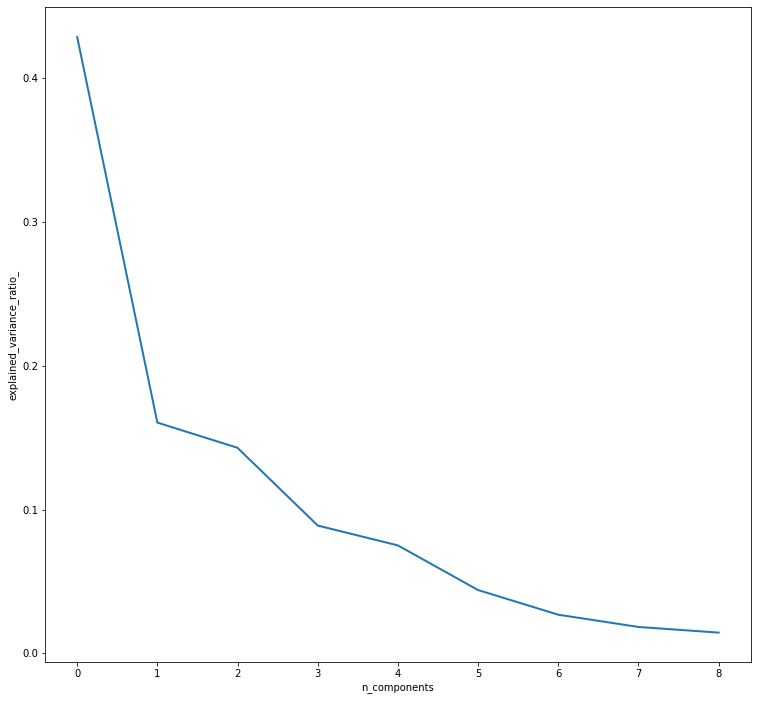

In [41]:
y=df['diagnosis']
X=df.drop(['diagnosis'],axis=1)

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

# Conclusion

Default data includes 31 feature but after feature selection we drop this number from 31 to 7 with accuracy 98%. 